# Estimation of Reactiviy Ratios

## Overview

The `polykin.copolymerization` module includes a method to estimate reactivity ratios from binary copolymer composition data. Arbitrary combinations of _instantaneous_ copolymer composition data and comonomer/copolymer composition _drift_ data can be regressed. Specifically, the method can process data in one of 3 forms:
* $F(f)$
* $f(x;f_0)$
* $F(x;f_0)$

This tutorial briefly illustrates these capabilities.

## $F(f)$ data fit

[van Herk & Dröge (1997)](https://research.tue.nl/files/1500487/617672.pdf) discuss various approaches to estimating the reactivity ratios and their respective statistical uncertainties. Let's replicate certain elements of their study using the $F(f)$ data for MMA(1)-DMA(2) as reported in Table 1 of their paper.

In [1]:
# %pip install polykin
from polykin.copolymerization import fit_copo_data, CopoDataset_Ff
from numpy import array

In [2]:
f1 = array([0.100, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800])
F1 = array([0.059, 0.243, 0.364, 0.486, 0.583, 0.721, 0.824])

We'll start by fitting the data using the nonlinear least squares (NLLS) method, assuming that all $F$ data points have the same _absolute_ error. In this scenario, the scaling for $f$ and $F$ is arbitrary. The first step is to pack the experimental data into a `CopoDataset_Ff` object.

In [3]:
ds = CopoDataset_Ff(name="van Herk & Dröge (1997)",
                    f1=f1, F1=F1)

Now, we launch the regression. By default, the joint confidence (JCR) region will be generated using an approximate (linear) method. For comparison, let's also request the calculation of the exact JCR. 

method:  NLLS
M1:      M1
M2:      M2
r1:      1.43E+00
r2:      1.67E+00
alpha:   0.05
se_r1:   9.08E-02
se_r2:   1.08E-01
ci_r1:   2.33E-01
ci_r2:   2.77E-01
cov:     [[8.24e-03 8.63e-03]
          [8.63e-03 1.16e-02]]


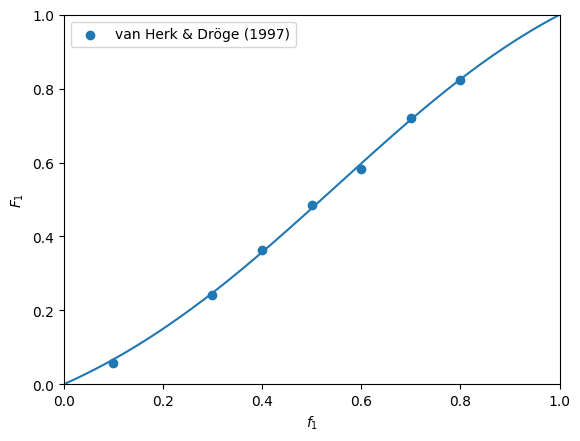

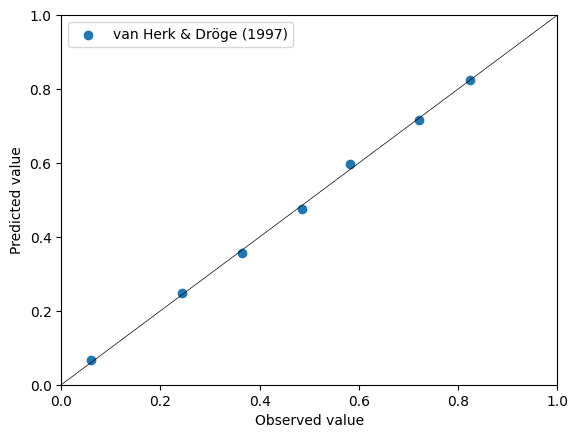

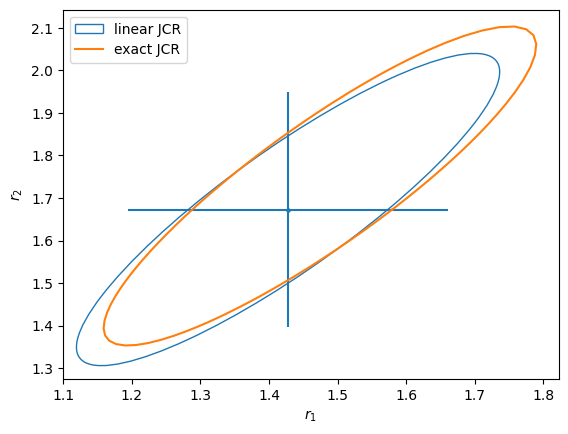

In [4]:
fit_copo_data(data_Ff=[ds], JCR_exact=True)

The point estimates of $r_1$ and $r_2$ match those reported in Table 3 of the aforementioned reference. The blue horizontal and vertical lines represent the individual confidence intervals of the reactivity ratios. A difference between the linear (approximate) and exact JCR is visible, but fairly small.

Now, let's try the orthogonal distance regression (ODR) method, also known as errors-in-variables, assuming absolute standard deviations of 5% for $F$ and 1% for $f$. In this case, the scale factors to matter, because they influence how the fit error is distributed between $f$ and $F$.

In [5]:
ds = CopoDataset_Ff(name="van Herk & Dröge (1997)",
                    f1=f1, F1=F1,
                    scale_f1=0.01, scale_F1=0.05)

method:  ODR
M1:      M1
M2:      M2
r1:      1.43E+00
r2:      1.67E+00
alpha:   0.05
se_r1:   9.10E-02
se_r2:   1.08E-01
ci_r1:   2.34E-01
ci_r2:   2.79E-01
cov:     [[8.29e-03 8.71e-03]
          [8.71e-03 1.18e-02]]


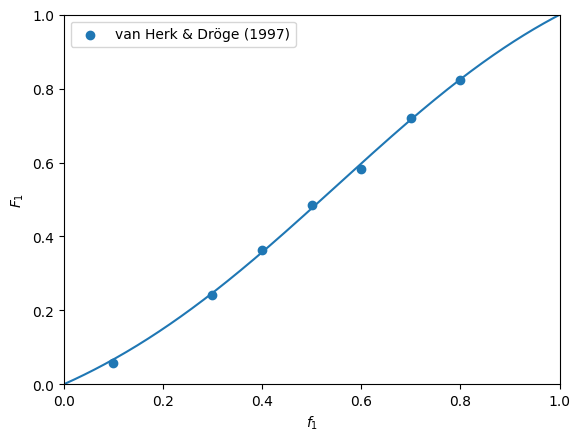

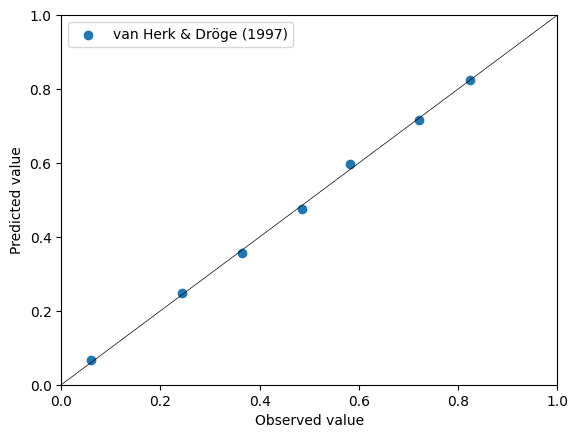

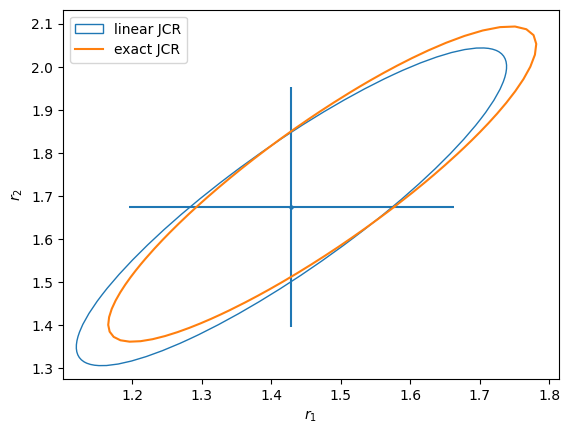

In [6]:
fit_copo_data(data_Ff=[ds], method='ODR', JCR_exact=True)

As expected, we obtain almost the same parameter estimates, because the data is smooth and $\sigma_f$ is low. Finally, for comparison, we also try fitting the data set with _relative_ standard deviations. 

In [7]:
ds = CopoDataset_Ff(name="van Herk & Dröge (1997)",
                    f1=f1, F1=F1,
                    scale_f1=0.01*f1, scale_F1=0.05*F1)

method:  ODR
M1:      M1
M2:      M2
r1:      1.71E+00
r2:      1.95E+00
alpha:   0.05
se_r1:   1.18E-01
se_r2:   7.46E-02
ci_r1:   3.03E-01
ci_r2:   1.92E-01
cov:     [[1.39e-02 6.91e-03]
          [6.91e-03 5.56e-03]]


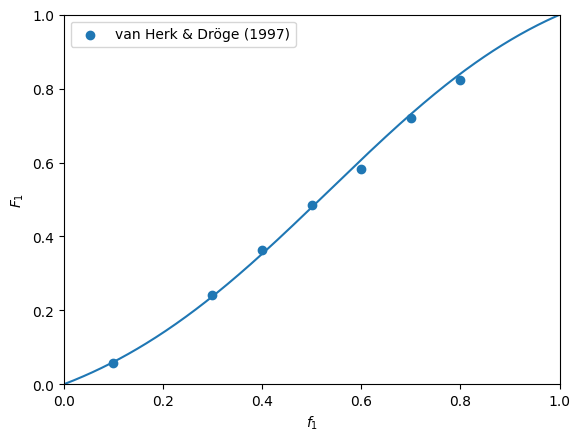

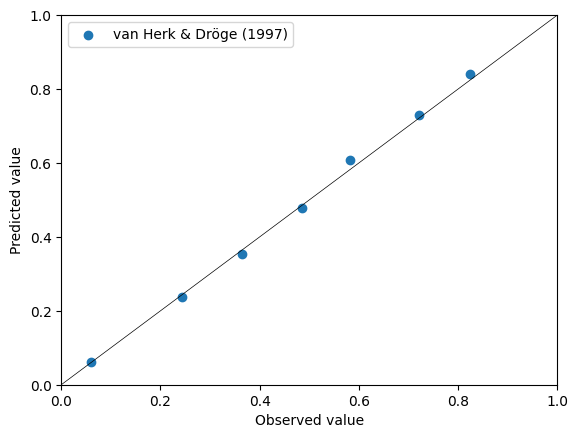

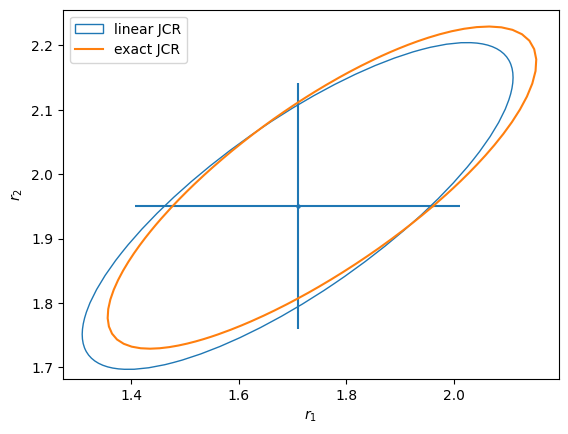

In [8]:
fit_copo_data(data_Ff=[ds], method='ODR', JCR_exact=True)

In this case, the point estimates of the reactivity ratio estimates are a bit higher. As before, the values are in perfect agreement with those reported in Table 3 of van Herk & Dröge (1997).

## $F(x,f_0)$ data fit

[Autzen et al. (2024)](https://doi.org/10.1039/D4PY00270A) describe the IUPAC recommended procedure to estimate reactivity ratios from composition data. Let's reproduce the example used in section "Application of the IUPAC recommended method". The first step is to pack the experimental data into `CopoDataset_Fx` objects. 

In [9]:
from polykin.copolymerization import CopoDataset_Fx

In [10]:
ds1 = CopoDataset_Fx(
    name="Schmidt-Naake-1",
    f10=0.05,
    x=array([0.04, 0.093, 0.195, 0.209, 0.279, 0.434]),
    F1=array([0.404, 0.381, 0.282, 0.316, 0.227, 0.146]),
    scale_F1=0.03)

ds2 = CopoDataset_Fx(
    name="Schmidt-Naake-2",
    f10=0.1,
    x=array([0.1, 0.182, 0.194, 0.301, 0.389, 0.474]),
    F1=array([0.458, 0.457, 0.407, 0.396, 0.347, 0.235]),
    scale_F1=0.03)

ds3 = CopoDataset_Fx(
    name="Schmidt-Naake-3",
    f10=0.3,
    x=array([0.109, 0.168, 0.201, 0.383, 0.456, 0.731]),
    F1=array([0.547, 0.491, 0.484, 0.486, 0.488, 0.467]),
    scale_F1=0.03)

ds4 = CopoDataset_Fx(
    name="Schmidt-Naake-4",
    f10=0.7,
    x=array([0.068, 0.186, 0.274, 0.332, 0.482, 0.577, 0.739]),
    F1=array([0.658, 0.654, 0.677, 0.642, 0.635, 0.649, 0.658]),
    scale_F1=0.03)

ds5 = CopoDataset_Fx(
    name="Schmidt-Naake-5",
    f10=0.9,
    x=array([0.13, 0.273, 0.43, 0.585, 0.71, 0.82]),
    F1=array([0.872, 0.856, 0.83, 0.915, 0.91, 0.88]),
    scale_F1=0.03)

And now we launch the regression, selecting the corresponding type of data.

method:  NLLS
M1:      M1
M2:      M2
r1:      4.00E-01
r2:      2.13E-02
alpha:   0.05
se_r1:   4.93E-02
se_r2:   5.49E-03
ci_r1:   1.01E-01
ci_r2:   1.12E-02
cov:     [[2.43e-03 2.74e-05]
          [2.74e-05 3.02e-05]]


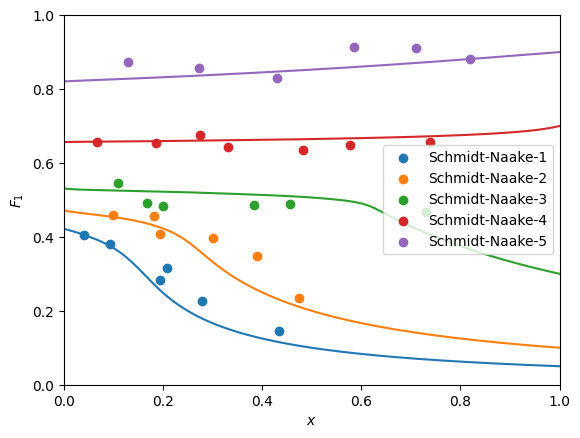

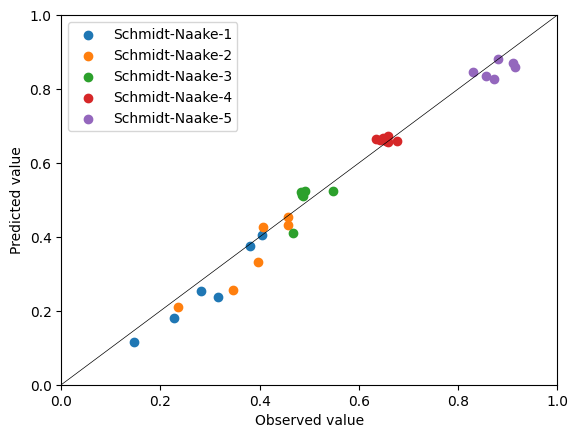

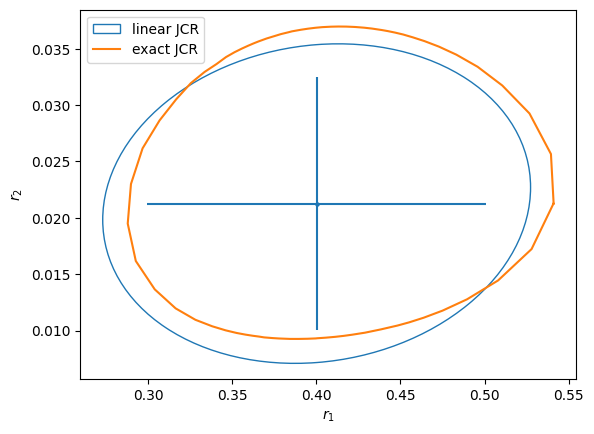

In [11]:
fit_copo_data(data_Fx=[ds1, ds2, ds3, ds4, ds5], JCR_exact=True)

These results are in perfect agreement with those reported in Figures 5 and 6 of Autzen et al. (2024).
Note that this case is numerically more demanding than the previous and the exact JCR algorithm delivers a somewhat less smooth solution.

## Joint $F(f)$, $f(x;f_0)$, and $F(x;f_0)$ data fit

This final example aims to demonstrate how the fitting method can handle arbitrary combinations of the three types of copolymer composition data. Since we are not aware of any system for which all three types of data have been reliably measured and reported, we have generated artificial data for the purpose of this tutorial.

In [12]:
from polykin.copolymerization import CopoDataset_fx, CopoDataset_Fx

In [13]:
# 1 set of F(x) data
data_Ff = CopoDataset_Ff(name='Ff-1',
                         f1=array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         F1=array([0.17, 0.31, 0.43, 0.57, 0.72]))

In [14]:
# 3 sets of f(x;f0) data
data_fx_1 = CopoDataset_fx(name='fx-1',
                           f10=0.6,
                           x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                           f1=array([0.63, 0.68, 0.73, 0.83, 0.97]))

data_fx_2 = CopoDataset_fx(name='fx-2',
                           f10=0.4,
                           x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                           f1=array([0.42, 0.41, 0.42, 0.40, 0.43]))

data_fx_3 = CopoDataset_fx(name='fx-3',
                           f10=0.2,
                           x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                           f1=array([0.18, 0.18, 0.14, 0.12, 0.05]))

In [15]:
# 1 set of F(x;f0) data
data_Fx = CopoDataset_Fx(name='Fx-1',
                        f10=0.8,
                        x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                        F1=array([0.65, 0.67, 0.69, 0.77, 0.77]))

method:  NLLS
M1:      M1
M2:      M2
r1:      2.07E-01
r2:      5.05E-01
alpha:   0.05
se_r1:   9.72E-03
se_r2:   1.37E-02
ci_r1:   2.01E-02
ci_r2:   2.83E-02
cov:     [[9.45e-05 7.26e-05]
          [7.26e-05 1.87e-04]]


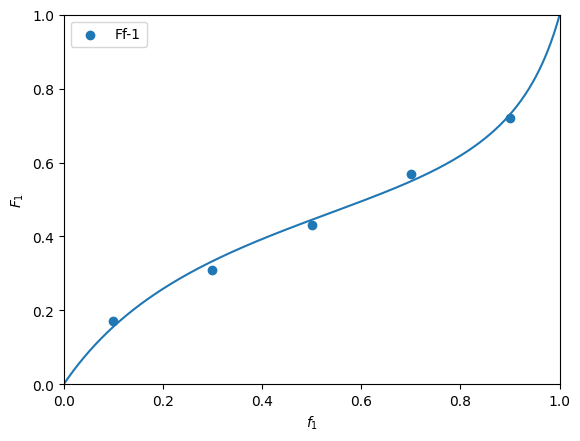

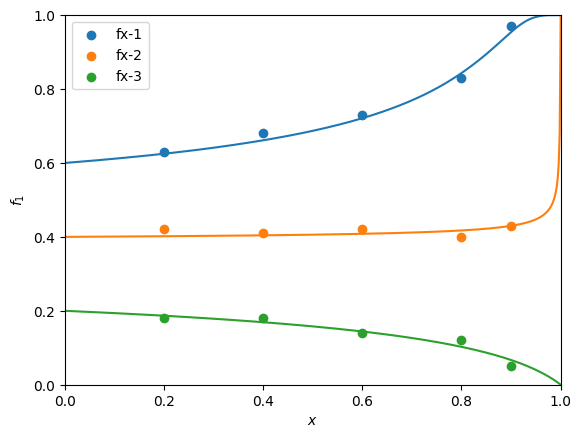

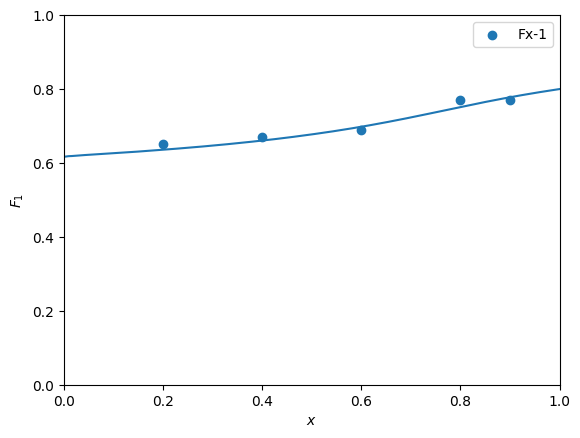

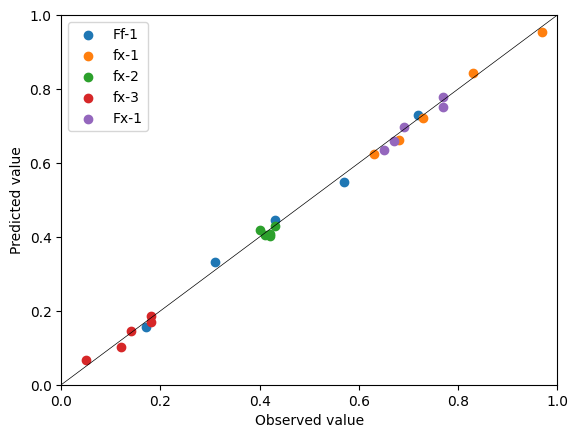

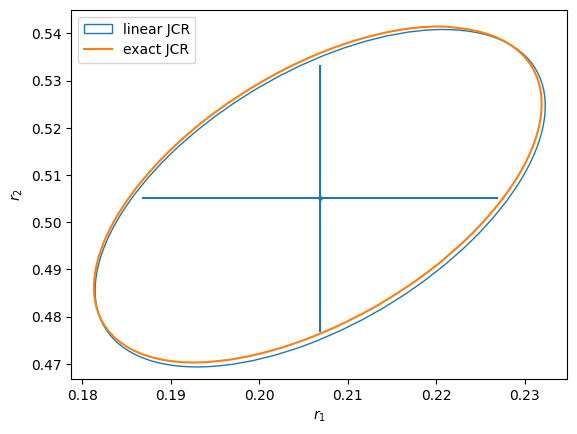

In [16]:
fit_copo_data(data_Ff=[data_Ff],
              data_fx=[data_fx_1, data_fx_2, data_fx_3],
              data_Fx=[data_Fx],
              JCR_exact=True)	

## Summary

* Efficient and validated nonlinear regression methods:
    * NLLS can be applied to all types of copolymerization data.
    * ODR (error-in-variables) is restriced to $F(f)$ data (in this particular implementation).
* Built-in calculation of the JCR:
    * The linear approximation seems to be good enough in most cases.
    * The exact method is theoretically more sound, albeit compuationally more demanding (and numerically less robust).
    * To save time, we recommend setting up the fit with the exact JCR method deactivated. Once everything is working fine, it can then be activated to obtain the final results.